In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import graphviz

In [2]:
df = pd.read_csv('../data/modified/ServiceAttributes.csv')
df.head()

,CustomerID,PhoneCoTenure,EquipmentRental,TotalServicesUsed,EquipmentPerMonth,DataPerMonth,VoicePerMonth,OwnsPC,HHIncome,Top50_Bottom50,clusterID
0,7415-IIKLBO-8VO,72,0,0,91.930556,181.166667,24.236111,0,35000,0,2
1,4069-WOXDZW-2Y0,56,0,0,109.285714,164.357143,16.214286,0,89000,0,2
2,3421-JRQVBI-0GE,70,0,0,86.957143,125.785714,35.342857,0,324000,0,1
3,8199-MOWDXQ-I84,73,0,0,85.534247,136.780822,20.904110,0,77000,0,2
4,5996-NSVZTW-7VD,73,0,6,50.958904,0.000000,186.095890,0,9000,0,3


In [3]:
df.columns

Index(['CustomerID', 'PhoneCoTenure', 'EquipmentRental', 'TotalServicesUsed',
       'EquipmentPerMonth', 'DataPerMonth', 'VoicePerMonth', 'OwnsPC',
       'HHIncome', 'Top50_Bottom50', 'clusterID'],
      dtype='object')

In [19]:
x = df[['PhoneCoTenure', 'EquipmentRental', 'TotalServicesUsed',
       'EquipmentPerMonth', 'DataPerMonth', 'VoicePerMonth', 'OwnsPC',
       'HHIncome']].copy()
y = df[['clusterID']].copy()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

C:\Users\mdpur\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred=clf.predict(X_test)

In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [22]:
feature_names = ['PhoneCoTenure', 'EquipmentRental', 'TotalServicesUsed',
       'EquipmentPerMonth', 'DataPerMonth', 'VoicePerMonth', 'OwnsPC',
       'HHIncome']

feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

HHIncome             0.484620
PhoneCoTenure        0.192174
VoicePerMonth        0.110322
EquipmentPerMonth    0.070586
DataPerMonth         0.069914
TotalServicesUsed    0.048294
EquipmentRental      0.018217
OwnsPC               0.005874
dtype: float64

In [23]:
df.clusterID.value_counts(dropna=False)

1    3427
0     834
2     459
3     280
Name: clusterID, dtype: int64

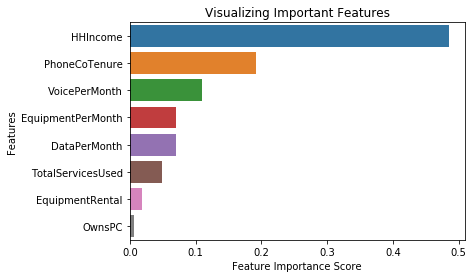

In [24]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

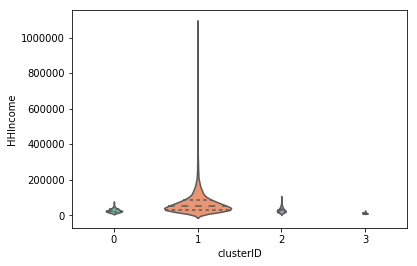

In [25]:
sns.violinplot(x="clusterID", y="HHIncome", data=df, palette="Set2", scale="count", inner="quartile")

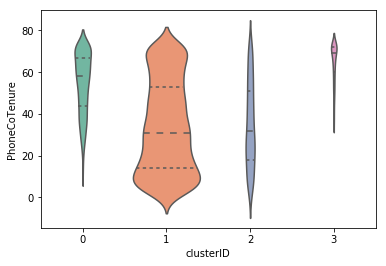

In [26]:
sns.violinplot(x="clusterID", y="PhoneCoTenure", data=df, palette="Set2", scale="count", inner="quartile")

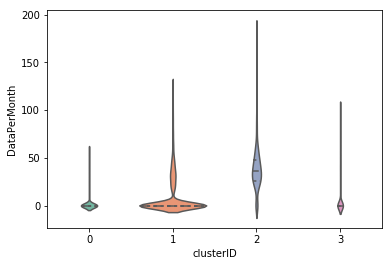

In [27]:
sns.violinplot(x="clusterID", y="DataPerMonth", data=df, palette="Set2", scale="count", inner="quartile")

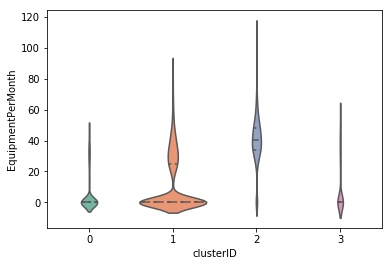

In [28]:
sns.violinplot(x="clusterID", y="EquipmentPerMonth", data=df, palette="Set2", scale="count", inner="quartile")

In [18]:
# Extract single tree
estimator = clf.estimators_[5]

# Export decision tree model
export_graphviz(estimator, out_file='../notebooks/tree.dot', 
                feature_names = feature_names,
                class_names = ['0','1','2','3'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','OutputFile.png'])

# Display in jupyter notebook
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [65]:
dot -Tps filename.dot -o outfile.ps

SyntaxError: invalid syntax (<ipython-input-65-c2ec0888e833>, line 1)

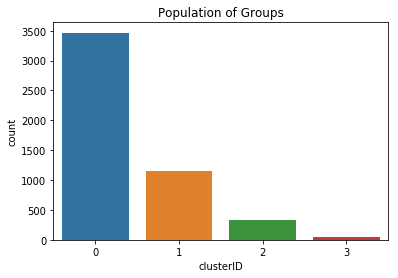

In [38]:
# Current Population of Groups
sns.countplot('clusterID', data=df)
# Add labels to your graph

plt.title('Population of Groups')
plt.show()